In [1]:
from __future__ import print_function
import pandas as pd
import os
import os.path as op

In [10]:
sagtbl = pd.read_csv("../data/hmp_tbls/sag_completeness.txt", sep="\t")
mgtbl = pd.read_csv("../data/hmp_tbls/multi_mg_qc.csv", sep="\t")
covtbl = pd.read_csv("../data/hmp_tbls/coverage_info.txt", sep="\t")

In [11]:
sagtbl

,Unnamed: 0,# genomes,# marker sets,# markers,0,1,2,3,4,5+,Bin Id,Completeness,Contamination,Marker lineage,Strain heterogeneity,calculated_length,total_bp
0,0,134,336,1173,7,1163,3,0,0,0,Ecoli4147faa.masked,99.35,0.12,f__Enterobacteriaceae (UID5124),0.0,5290619,5256230
1,0,293,267,475,1,473,1,0,0,0,EfaecalisTX1322.masked,99.63,0.19,o__Lactobacillales (UID544),0.0,2940481,2929602
2,0,434,186,278,0,228,50,0,0,0,OlaneusYIT12061.masked,100.00,20.97,k__Bacteria (UID2569),100.0,4394574,4394574
3,0,92,270,487,3,483,1,0,0,0,PstercoreaDSM18206.masked,98.89,0.37,o__Bacteroidales (UID2716),0.0,3127382,3092669
4,0,1487,161,256,3,216,37,0,0,0,Swadsworthensis.masked,98.14,16.15,p__Proteobacteria (UID3887),97.3,2941130,2886425


In [12]:
sagtbl['sag'] = [i.split(".")[0] for i in sagtbl['Bin Id']]

In [13]:
sagtbl.rename(columns={'Completeness':'sag_completeness', 
                           'total_bp':'sag_total_bp', 
                           'calculated_length':'sag_calculated_length'}, 
                           inplace=True)
sagshort = sagtbl[['sag', 'sag_completeness', 'sag_total_bp', 'sag_calculated_length']]

In [14]:
sagshort

,sag,sag_completeness,sag_total_bp,sag_calculated_length
0,Ecoli4147faa,99.35,5256230,5290619
1,EfaecalisTX1322,99.63,2929602,2940481
2,OlaneusYIT12061,100.00,4394574,4394574
3,PstercoreaDSM18206,98.89,3092669,3127382
4,Swadsworthensis,98.14,2886425,2941130


In [15]:
mgtbl

,Unnamed: 0,mg_f,mg_r,wgs_technology,join,name,read_count,to_recruit
0,0,/mnt/stepanauskas_nfs/julia/testfragrecruitmen...,/mnt/stepanauskas_nfs/julia/testfragrecruitmen...,illumina,True,SRS019030,5325310,hmp_results/mgs/SRS019030.extendedFrags.minlen...
1,1,/mnt/stepanauskas_nfs/julia/testfragrecruitmen...,/mnt/stepanauskas_nfs/julia/testfragrecruitmen...,illumina,True,SRS022524,2518,hmp_results/mgs/SRS022524.extendedFrags.minlen...
2,2,/mnt/stepanauskas_nfs/julia/testfragrecruitmen...,/mnt/stepanauskas_nfs/julia/testfragrecruitmen...,illumina,True,SRS078197,27452,hmp_results/mgs/SRS078197.extendedFrags.minlen...
3,3,/mnt/stepanauskas_nfs/julia/testfragrecruitmen...,None,pyro,False,SRR063559,772443,hmp_results/mgs/SRR063559.minlen_150.fastq.gz
4,4,/mnt/stepanauskas_nfs/julia/testfragrecruitmen...,None,pyro,False,SRR063903,1323126,hmp_results/mgs/SRR063903.minlen_150.fastq.gz
5,5,/mnt/stepanauskas_nfs/julia/testfragrecruitmen...,None,pyro,False,SRR061736,1182987,hmp_results/mgs/SRR061736.minlen_150.fastq.gz


In [16]:
mgtbl.rename(columns={'name':'metagenome', 
                          'wgs_technology':'mg_wgs_technology', 
                          'read_count':'mg_read_count'}, 
                          inplace=True)
mgshort = mgtbl[['metagenome', 'mg_wgs_technology', 'mg_read_count']]

In [17]:
mgshort

,metagenome,mg_wgs_technology,mg_read_count
0,SRS019030,illumina,5325310
1,SRS022524,illumina,2518
2,SRS078197,illumina,27452
3,SRR063559,pyro,772443
4,SRR063903,pyro,1323126
5,SRR061736,pyro,1182987


In [21]:
covtbl['sag'] = [i.split(".")[0] for i in covtbl['sag']]

In [48]:
summary = covtbl.merge(mgshort, how='outer', on='metagenome')

In [49]:
summary = summary.merge(sagshort, how='outer', on='sag') 

In [50]:
summary
wgs_factors = {'illumina':0.8376, 'pyro':1}

In [51]:
summary['prop_mg_recruited'] = (summary.total_reads_recruited)*100/summary.sag_completeness/summary.mg_read_count
summary['prop_mg_adjusted'] = summary['prop_mg_recruited']*summary['mg_wgs_technology'].map(wgs_factors)

In [52]:
summary

,Unnamed: 0,sag,metagenome,Percent_scaffolds_with_any_coverage,Percent_of_reference_bases_covered,Average_coverage,total_reads_recruited,mg_wgs_technology,mg_read_count,sag_completeness,sag_total_bp,sag_calculated_length,prop_mg_recruited,prop_mg_adjusted
0,0,Ecoli4147faa,SRS019030,100,7.366905,0.079989,2601,illumina,5325310,99.35,5256230,5290619,4.916178e-04,4.117791e-04
1,0,Ecoli4147faa,SRS022524,NaN,0.000000,0.000000,0,illumina,2518,99.35,5256230,5290619,0.000000e+00,0.000000e+00
2,0,Ecoli4147faa,SRS078197,NaN,0.000000,0.000000,0,illumina,27452,99.35,5256230,5290619,0.000000e+00,0.000000e+00
3,0,Ecoli4147faa,SRR063559,100,3.687101,0.043821,457,pyro,772443,99.35,5256230,5290619,5.955002e-04,5.955002e-04
4,0,Ecoli4147faa,SRR063903,100,0.631277,0.010251,71,pyro,1323126,99.35,5256230,5290619,5.401188e-05,5.401188e-05
5,0,Ecoli4147faa,SRR061736,NaN,0.000000,0.000000,0,pyro,1182987,99.35,5256230,5290619,0.000000e+00,0.000000e+00
6,0,EfaecalisTX1322,SRS019030,100,2.404554,0.042969,23,illumina,5325310,99.63,2929602,2940481,4.335037e-06,3.631027e-06
7,0,EfaecalisTX1322,SRS022524,NaN,0.000000,0.000000,0,illumina,2518,99.63,2929602,2940481,0.000000e+00,0.000000e+00
8,0,EfaecalisTX1322,SRS078197,100,1.821641,0.037855,5,illumina,27452,99.63,2929602,2940481,1.828125e-04,1.531237e-04
9,0,EfaecalisTX1322,SRR063559,100,0.695724,0.124096,31,pyro,772443,99.63,2929602,2940481,4.028145e-05,4.028145e-05


In [53]:
mgs = ["SRS022524", "SRS019030","SRS078197","SRR063903","SRR063559","SRR061736"]
groups = ["A", "B", "C", "A", "B", "C"]
d = {"metagenome":mgs, "group":groups}
mg_grps = pd.DataFrame(d)

In [54]:
mg_grps

,group,metagenome
0,A,SRS022524
1,B,SRS019030
2,C,SRS078197
3,A,SRR063903
4,B,SRR063559
5,C,SRR061736


In [55]:
summary = summary.merge(mg_grps, on="metagenome")

In [56]:
summary

,Unnamed: 0,sag,metagenome,Percent_scaffolds_with_any_coverage,Percent_of_reference_bases_covered,Average_coverage,total_reads_recruited,mg_wgs_technology,mg_read_count,sag_completeness,sag_total_bp,sag_calculated_length,prop_mg_recruited,prop_mg_adjusted,group
0,0,Ecoli4147faa,SRS019030,100,7.366905,0.079989,2601,illumina,5325310,99.35,5256230,5290619,4.916178e-04,4.117791e-04,B
1,0,EfaecalisTX1322,SRS019030,100,2.404554,0.042969,23,illumina,5325310,99.63,2929602,2940481,4.335037e-06,3.631027e-06,B
2,0,OlaneusYIT12061,SRS019030,100,1.574076,4.988826,8215,illumina,5325310,100.00,4394574,4394574,1.542633e-03,1.292110e-03,B
3,0,PstercoreaDSM18206,SRS019030,100,28.284678,5.814961,48979,illumina,5325310,98.89,3092669,3127382,9.300636e-03,7.790213e-03,B
4,0,Swadsworthensis,SRS019030,100,0.418678,0.014017,147,illumina,5325310,98.14,2886425,2941130,2.812719e-05,2.355934e-05,B
5,0,Ecoli4147faa,SRS022524,NaN,0.000000,0.000000,0,illumina,2518,99.35,5256230,5290619,0.000000e+00,0.000000e+00,A
6,0,EfaecalisTX1322,SRS022524,NaN,0.000000,0.000000,0,illumina,2518,99.63,2929602,2940481,0.000000e+00,0.000000e+00,A
7,0,OlaneusYIT12061,SRS022524,100,0.034105,0.000336,1,illumina,2518,100.00,4394574,4394574,3.971406e-04,3.326450e-04,A
8,0,PstercoreaDSM18206,SRS022524,100,1.295492,0.059863,18,illumina,2518,98.89,3092669,3127382,7.228770e-03,6.054818e-03,A
9,0,Swadsworthensis,SRS022524,100,0.035298,0.000351,1,illumina,2518,98.14,2886425,2941130,4.046674e-04,3.389494e-04,A


In [58]:
%load_ext rpy2.ipython
%R library(ggplot2); library(dplyr)

//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  res = super(Function, self).__call__(*new_args, **new_kwargs)


array(['dplyr', 'ggplot2', 'tools', 'stats', 'graphics', 'grDevices',
       'utils', 'datasets', 'methods', 'base'], 
      dtype='|S9')

In [61]:
%%R -i summary
head(summary)

  Unnamed..0                sag metagenome Percent_scaffolds_with_any_coverage
0          0       Ecoli4147faa  SRS019030                                 100
1          0    EfaecalisTX1322  SRS019030                                 100
2          0    OlaneusYIT12061  SRS019030                                 100
3          0 PstercoreaDSM18206  SRS019030                                 100
4          0    Swadsworthensis  SRS019030                                 100
5          0       Ecoli4147faa  SRS022524                                 NaN
  Percent_of_reference_bases_covered Average_coverage total_reads_recruited
0                          7.3669053       0.07998874                  2601
1                          2.4045540       0.04296876                    23
2                          1.5740761       4.98882629                  8215
3                         28.2846776       5.81496074                 48979
4                          0.4186781       0.01401729              

In [70]:
%%R
summary %>% filter(mg_wgs_technology=="illumina") -> ill
summary %>% filter(mg_wgs_technology=="pyro") -> py

colnames(ill) <- paste(colnames(ill), "_i", sep="")
colnames(py) <- paste(colnames(py), "_p", sep="")
colnames(ill)[2] <- "sag"
colnames(py)[2] <- "sag"
colnames(ill)[15] <- "group"
colnames(py)[15] <- "group"

sbs <- merge(ill, py, by=c("sag","group"))
sbs

                  sag group Unnamed..0_i metagenome_i
1        Ecoli4147faa     A            0    SRS022524
2        Ecoli4147faa     B            0    SRS019030
3        Ecoli4147faa     C            0    SRS078197
4     EfaecalisTX1322     A            0    SRS022524
5     EfaecalisTX1322     B            0    SRS019030
6     EfaecalisTX1322     C            0    SRS078197
7     OlaneusYIT12061     A            0    SRS022524
8     OlaneusYIT12061     B            0    SRS019030
9     OlaneusYIT12061     C            0    SRS078197
10 PstercoreaDSM18206     A            0    SRS022524
11 PstercoreaDSM18206     B            0    SRS019030
12 PstercoreaDSM18206     C            0    SRS078197
13    Swadsworthensis     A            0    SRS022524
14    Swadsworthensis     B            0    SRS019030
15    Swadsworthensis     C            0    SRS078197
   Percent_scaffolds_with_any_coverage_i Percent_of_reference_bases_covered_i
1                                    NaN                  

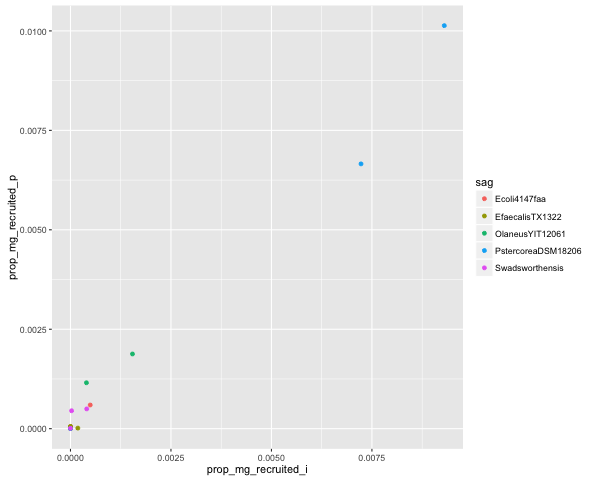

In [79]:
%%R -w 600
sbs %>% ggplot(aes(prop_mg_recruited_i, prop_mg_recruited_p, color=sag)) + geom_point()

In [75]:
%%R
# from: https://susanejohnston.wordpress.com/2012/08/09/a-quick-and-easy-function-to-plot-lm-results-in-r/
ggplotRegression <- function (fit) {

require(ggplot2)

ggplot(fit$model, aes_string(x = names(fit$model)[2], y = names(fit$model)[1])) + 
  geom_point(size=3) +
  stat_smooth(method = "lm", col = "grey") +
  labs(title = paste("Adj R2 = ",signif(summary(fit)$adj.r.squared, 5),
                     "Intercept =",signif(fit$coef[[1]],5 ),"\n",
                     " Slope =",signif(fit$coef[[2]], 5),
                     " P =",signif(summary(fit)$coef[2,4], 5)))
}

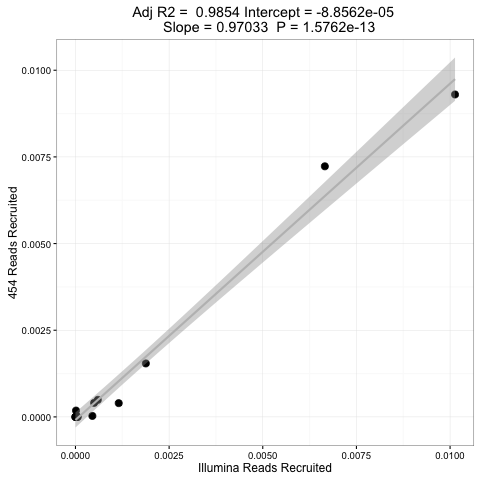

In [76]:
%%R
fit1 <- lm(prop_mg_recruited_i ~ prop_mg_recruited_p, data = sbs)
ggplotRegression(fit1)+theme_bw()+labs(x="Illumina Reads Recruited", y="454 Reads Recruited")

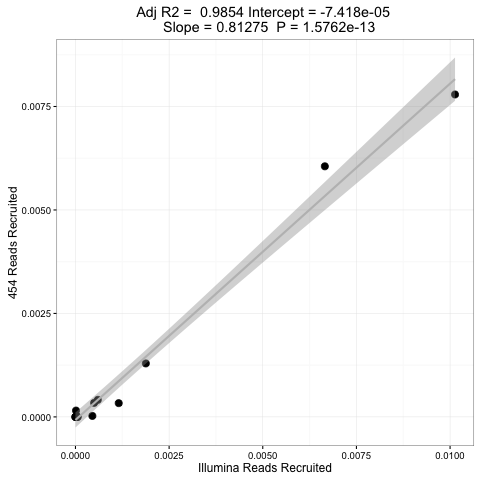

In [77]:
%%R
fit1 <- lm(prop_mg_adjusted_i ~ prop_mg_adjusted_p, data = sbs)
ggplotRegression(fit1)+theme_bw()+labs(x="Illumina Reads Recruited", y="454 Reads Recruited")